In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [56]:
# Membaca Nilai dataset nya
df = pd.read_csv(r'C:\Users\Faiz Arkam Bustomi\OneDrive\Dokumen\Data Mining\Data File\cs_students.csv')
display(df.head())

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


In [66]:
# Menampilkan 5 baris pertama dan terakhir dari dataset
first_five_rows = df.head()
last_five_rows = df.tail()

first_five_rows, last_five_rows

(   Student ID           Name  Gender  Age  GPA             Major  \
 0           1     John Smith    Male   21  3.5  Computer Science   
 1           2  Alice Johnson  Female   20  3.2  Computer Science   
 2           3   Robert Davis    Male   22  3.8  Computer Science   
 3           4   Emily Wilson  Female   21  3.7  Computer Science   
 4           5  Michael Brown    Male   23  3.4  Computer Science   
 
          Interested Domain             Projects                 Future Career  \
 0  Artificial Intelligence  Chatbot Development   Machine Learning Researcher   
 1             Data Science       Data Analytics                Data Scientist   
 2     Software Development   E-commerce Website             Software Engineer   
 3          Web Development   Full-Stack Web App                 Web Developer   
 4            Cybersecurity     Network Security  Information Security Analyst   
 
     Python     SQL     Java  
 0   Strong  Strong     Weak  
 1  Average  Strong     Weak

In [57]:
# Menampilkan informasi dataset nya
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         180 non-null    int64  
 1   Name               180 non-null    object 
 2   Gender             180 non-null    object 
 3   Age                180 non-null    int64  
 4   GPA                180 non-null    float64
 5   Major              180 non-null    object 
 6   Interested Domain  180 non-null    object 
 7   Projects           180 non-null    object 
 8   Future Career      180 non-null    object 
 9   Python             180 non-null    object 
 10  SQL                180 non-null    object 
 11  Java               180 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 17.0+ KB
None


In [59]:
# Memeriksa nilai missing
missing_values = df.isnull().sum()
print(missing_values)

Student ID           0
Name                 0
Gender               0
Age                  0
GPA                  0
Major                0
Interested Domain    0
Projects             0
Future Career        0
Python               0
SQL                  0
Java                 0
dtype: int64


In [60]:
# Memeriksa outliers dengan IQR
numerical_colums = df.select_dtypes(include=['float64', 'int64']).columns
outliers = {}
for col in numerical_colums:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
print(outliers)

{'Student ID': 0, 'Age': 9, 'GPA': 0}


In [61]:
desc_stats = df[numerical_colums].agg(['mean', 'median', 'std', 'var', 'skew', 'kurt'])
# Mengambil mode pertama
mode_values = df[numerical_colums].mode().iloc[0]
print(desc_stats)
print('Mode:', mode_values)

         Student ID        Age       GPA
mean      90.500000  22.116667  3.615000
median    90.500000  22.000000  3.600000
std       52.105662   2.823040  0.177341
var     2715.000000   7.969553  0.031450
skew       0.000000   3.625252 -0.400037
kurt      -1.200000  14.484777 -0.649287
Mode: Student ID     1.0
Age           22.0
GPA            3.7
Name: 0, dtype: float64


In [62]:
# Pastikan numpy diimpor
import pandas as pd
import numpy as np

# Membuat dataset dari path yang diberikan
df = pd.read_csv(r'C:\Users\Faiz Arkam Bustomi\OneDrive\Dokumen\Data Mining\Data File\cs_students.csv')

# Pilih kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

# Menghitung nilai korelasi absolut tertinggi, kecuali diagonal
correlation_matrix_no_diag = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
max_corr = correlation_matrix_no_diag.abs().max().max()

# Mendapatkan pasangan variabel dengan korelasi tertinggi
highest_corr_pair = correlation_matrix_no_diag.abs().stack().idxmax()

print("Pasangan variabel dengan korelasi tertinggi:", highest_corr_pair)
print("Nilai korelasi tertinggi:", max_corr)

Pasangan variabel dengan korelasi tertinggi: ('Age', 'GPA')
Nilai korelasi tertinggi: 0.2029246915972198


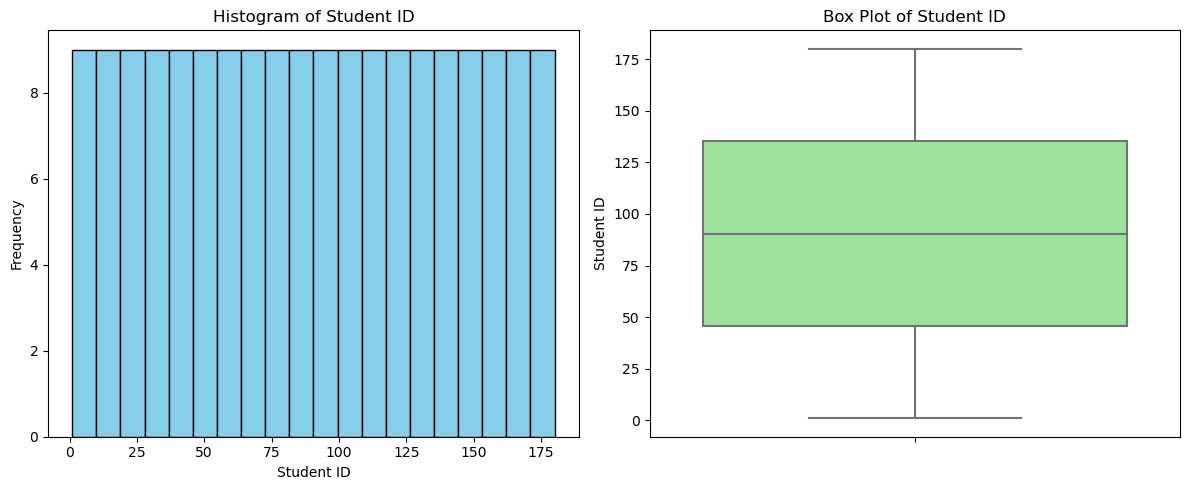

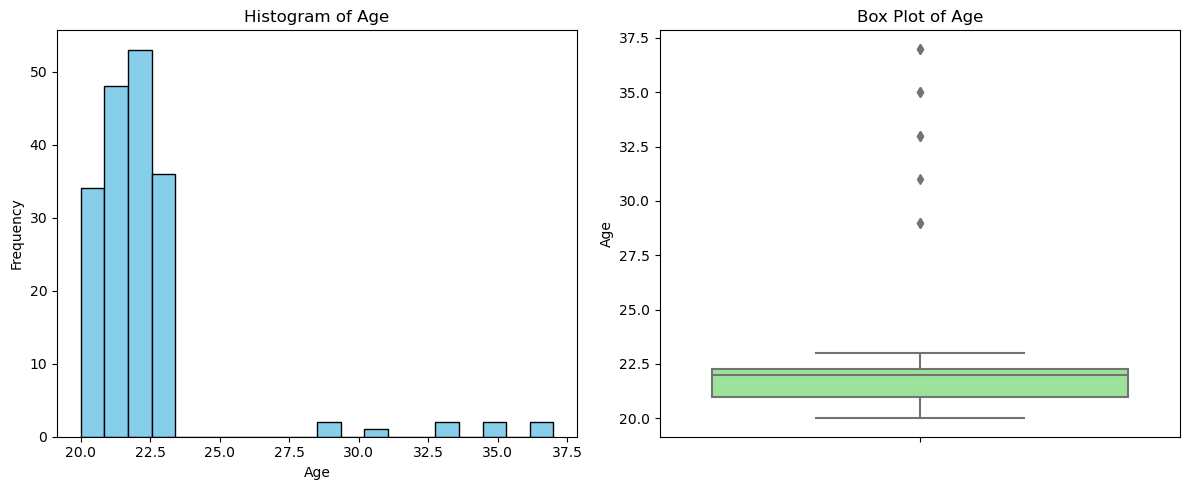

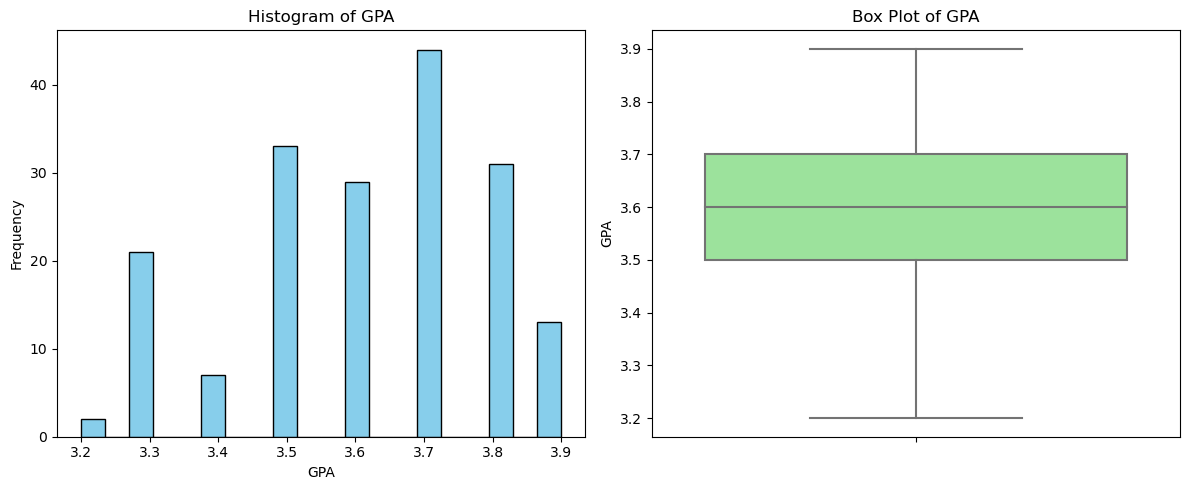

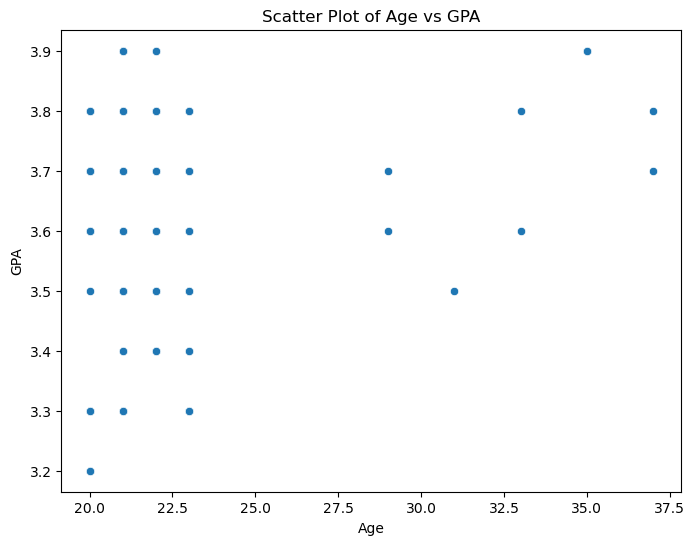

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan df sudah berisi dataset yang telah dimuat sebelumnya
# df = pd.read_csv('path_to_your_dataset.csv')

# Pilih kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Membuat histogram dan box plot untuk setiap variabel numerik
for col in numerical_columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()

# Menghitung matriks korelasi
correlation_matrix = df[numerical_columns].corr().abs()

# Menghilangkan diagonal
np.fill_diagonal(correlation_matrix.values, 0)

# Mencari pasangan variabel dengan korelasi tertinggi
highest_corr_pair = correlation_matrix.stack().idxmax()

# Scatter plot untuk pasangan variabel dengan korelasi tertinggi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[highest_corr_pair[0]], y=df[highest_corr_pair[1]])
plt.title(f'Scatter Plot of {highest_corr_pair[0]} vs {highest_corr_pair[1]}')
plt.xlabel(highest_corr_pair[0])
plt.ylabel(highest_corr_pair[1])
plt.show()


Laporan yang dapat saya sampaikan yaitu data numerik yang disampaikan diatas memiliki distribusi yang mungkin normal. Dari yang saya cek missing values di dataset atas, hasil yang ditampilkan tidak ada atau 0, hal tersebut tidak memerlukan hal lain untuk itu. Kesimpulan yang saya dapatkan itu bahwa ada beberapa distribusi yang tak normal, korelasi yang lemah namun penting, serta adanya outlier yang perlu diperhatikan dalam penelitian selanjutnya.